In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from Scripts import project_functions

# Exploratory Data Analysis
   

**About:**

The data in this dataset is regarding the airbnb listings in Dublin, Ireland. The original dataset contains 15 columns and 19277 rows. These 15 columns (i.e variables) are either categorical or numerical data or string objects. The dataset contains useful information about the name of the Airbnbs, the name of the hosts who owns the Airbnb, the location of the Airbnb, the price, the minimum nights, availability,number of reviews etc. The aim of this analysis is to speculate how price and all the other factors depend on each other. By observing potential trends or relationships between these variables we aim to predict future prices and preferred room types and how other factors(like locality, room types, etc) affect it.  


## Dataset Cleaning and Loading

In [3]:
df_bnb=project_functions.load_and_process('../../Data/raw/listings.csv')
df_bnb

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,3191,malleson garden cottage,3754,brigitte,ward 57,-33.947390,18.476000,entire home/apt,497.0,3.0,54,1,327
1,15007,blaauwberg house,59072,dirk,ward 23,-33.800010,18.460630,entire home/apt,4873.0,2.0,28,6,268
2,15077,top relaxed beach living in style,59342,georg,ward 4,-33.858120,18.490430,private room,1692.0,5.0,5,5,335
3,15180,the melkbaai - beachfront,59663,heinri,ward 83,-34.111240,18.823490,entire home/apt,580.0,2.0,0,1,0
4,15199,self catering apartment,59694,alexa,ward 115,-33.910440,18.412390,entire home/apt,2500.0,14.0,2,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19272,47226603,waterfall 2 bedroom apartment in camps bay,6269301,lisa,ward 54,-33.963088,18.375922,entire home/apt,3074.0,3.0,0,29,358
19273,47226853,tranquil garden cottage with fast internet,3374257,diana,ward 74,-34.045456,18.366974,entire home/apt,671.0,4.0,0,5,358
19274,47230584,quaint mountain retreat above boulders beach,16229677,anthony and juliet,ward 61,-34.206961,18.452896,entire home/apt,559.0,2.0,0,2,82
19275,47231253,heide acc. in serengeti complex,73013529,engela,ward 21,-33.878198,18.644850,entire home/apt,743.0,2.0,0,2,82


## Exploring the dataset

In [4]:
df_bnb.shape

(19277, 13)

In [5]:
df_bnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
df_bnb[df_bnb['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
9396,25776206,cape town city centre apt ★free parking and wifi★,119277747,NaN,ward 115,-33.92111,18.41673,entire home/apt,840.0,1.0,57,1,139


In [7]:
df_bnb.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
id,19277.0,2.646915e+07,1.343571e+07,3191.00000,1.567609e+07,2.703828e+07,3.937148e+07,4.723297e+07
host_id,19277.0,1.072429e+08,1.006227e+08,3754.00000,2.603210e+07,6.609031e+07,1.656463e+08,3.813097e+08
latitude,19277.0,-3.396167e+01,1.014487e-01,-34.26440,-3.402682e+01,-3.393433e+01,-3.391034e+01,-3.351615e+01
longitude,19277.0,1.847833e+01,1.281765e-01,18.31941,1.840325e+01,1.843800e+01,1.848843e+01,1.894104e+01
price,19277.0,2.855342e+03,6.633070e+03,122.00000,7.000000e+02,1.300000e+03,2.650000e+03,1.430000e+05
minimum_nights,19277.0,4.133328e+00,1.353928e+01,1.00000,1.000000e+00,2.000000e+00,3.000000e+00,3.650000e+02
number_of_reviews,19277.0,1.540390e+01,3.141794e+01,0.00000,0.000000e+00,3.000000e+00,1.500000e+01,4.630000e+02
calculated_host_listings_count,19277.0,9.669503e+00,2.827685e+01,1.00000,1.000000e+00,2.000000e+00,5.000000e+00,2.250000e+02
availability_365,19277.0,2.247945e+02,1.328832e+02,0.00000,9.000000e+01,2.690000e+02,3.510000e+02,3.650000e+02


In [8]:
df_bnb.describe(include='object').T

,count,unique,top,freq
name,19277,18651,home away from home,28
host_name,19276,4542,charles,239
neighbourhood,19277,93,ward 115,3264
room_type,19277,4,entire home/apt,14349


#### BoxPlot
Boxplots help determine outliers. 
From the below boxplots its clear that majority of the prices lie below 140000.
Almost all the values for minimum nights lie below 350.

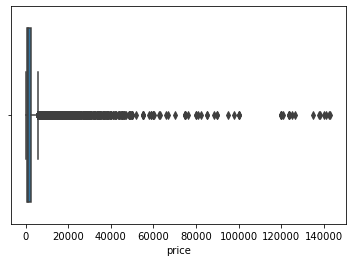

In [9]:
sns.boxplot(x=df_bnb['price'])
plt.ioff()

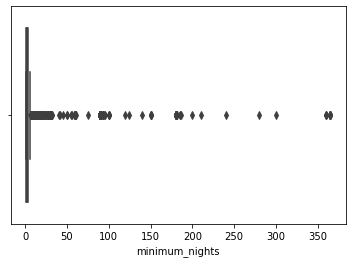

In [10]:
sns.boxplot(x=df_bnb['minimum_nights'])
plt.ioff()

### Key Observations:
- ward 115 is the most popular location for bnbs.
- the most listed room type is an entire home or an apartment
- the minimum nights of stay varies from 1 day to 365 days( or 1 year)
- if the the availability is less, it means the particular bnb listing is more popular.
- (Further observations above each visualization)

### Potential areas of interest:
- What is relation between price and room type?
- What is the relation between price and number of nights?
- What is the relation between price and neighbourhood?
- What is the relation between price and number of reviews?
- What is the relation between price and availability? 
- What is the relation between the number of nights and the room type?
- Which room type has the maximum and the minimum listings?
- Which room type is the most expensive and the least expensive?
- What is the availability of different room types throughout the year?


## Visualizations to understand nature and relationship between variables

#### HeatMap
The below heatmap gives the correlation between different variables.


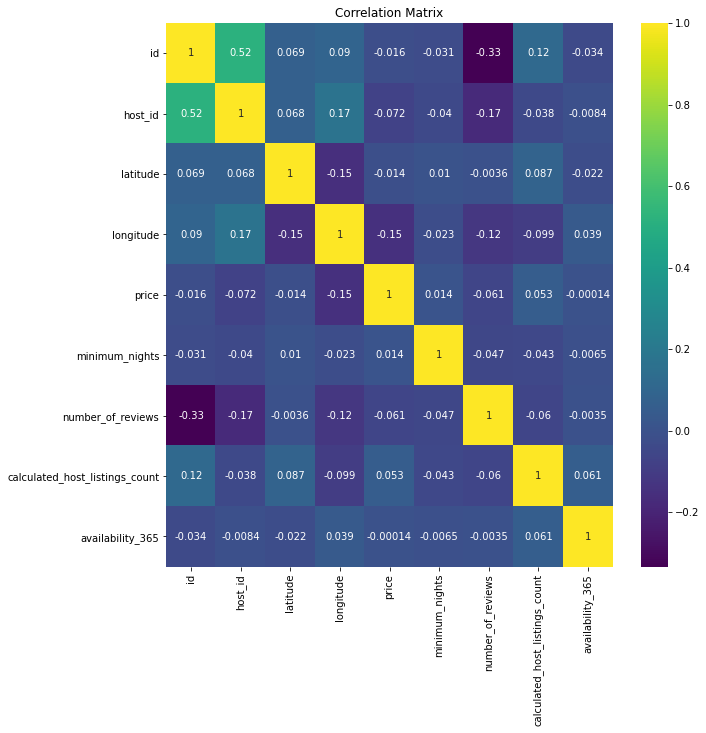

In [16]:
fig,ax=plt.subplots(figsize=(10,10))
corr = df_bnb.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.color_palette('viridis', as_cmap=True), ax=ax).set_title('Correlation Matrix')
plt.ioff()

#### Scatter Plot: Room type locations based on latitude and longitude
The below scatter plot gives a great estimate about how different room types are spread out across Dublin. 

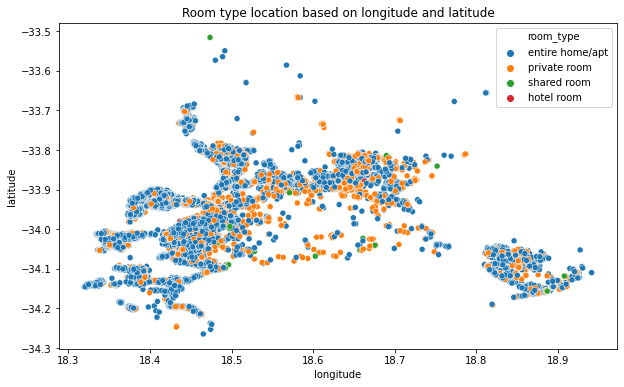

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude',y='latitude',hue='room_type',data=df_bnb).set_title('Room type location based on longitude and latitude')
plt.ioff()

#### Count Plot: Different types of rooms
The below count plot shows that the most common room types are an entire home or apartements. This is closely followed by the private room type. The least common ones are the shared room type.

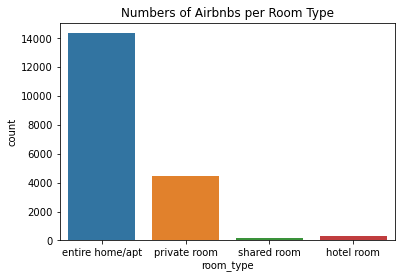

In [62]:
sns.countplot(x='room_type',data=df_bnb).set_title('Numbers of Airbnbs per Room Type')
plt.ioff()

#### Catplot: Availability vs Room type
From the below plot we can see that entire homes and apartments are available throughout the year, and shared rooms closely follow. The least available is the shared room types, probably because the number of listings of the shared room type are comparatively less.

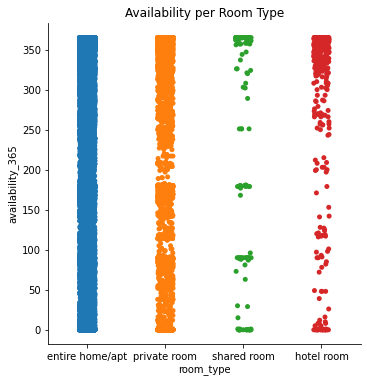

In [18]:
sns.catplot(y='availability_365',x='room_type',data=df_bnb).set(title='Availability per Room Type')
plt.ioff()

#### Scatter Plot: Price vs Minimum Nights
The below scatter plot gives the relationship between minimum nights and the price.
From the plot it can be seen that as price increases, the minimum number of nights decreases. Another interesting observation is that majority of the bnbs are listed out between €0 to €60,000 and the minimum nights stayed are mostly below 50. 

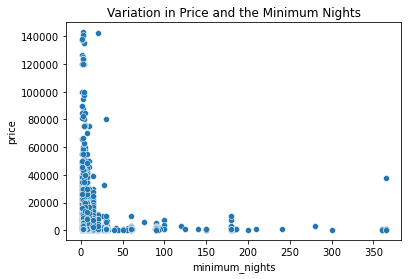

In [19]:
sns.scatterplot(y='price',x='minimum_nights',data=df_bnb).set_title('Variation in Price and the Minimum Nights')
plt.ioff()

#### Bar Plot: Price vs Room_type 
The below plot gives the relationship between room_type and price. From the plot, it is clear that the most expensive room types are enitre home/apartments. This is closely followed by the hotel room type. The least expensive ones are the shared rooms.

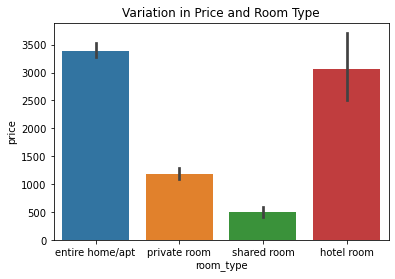

In [20]:
sns.barplot(x='room_type',y='price' ,data=df_bnb).set_title('Variation in Price and Room Type')
plt.ioff()

#### Scatter Plot: Price vs Neighbourhood Location

From the below plot its evident that ward 54 has the most number of expensive bnbs, indicating that its a an expensive and a posh locality. On an average, most bnbs are below €20,000.

<ipython-input-24-18c020ff06b6>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels=df_bnb['neighbourhood'].unique(),rotation=90)


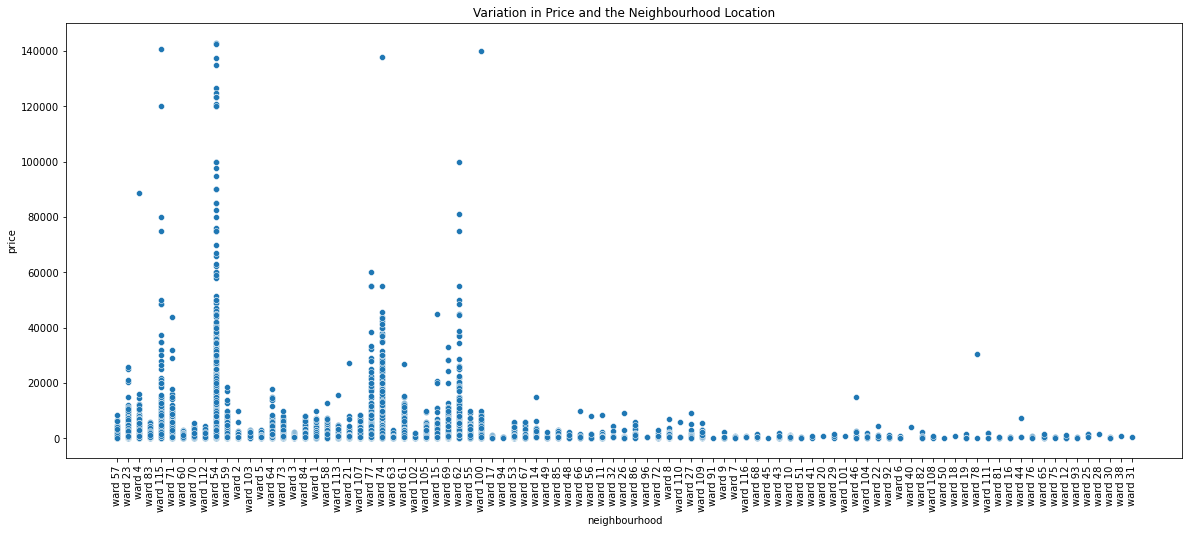

In [24]:
fig,ax=plt.subplots(figsize=(20,8))
g=sns.scatterplot(y='price',x='neighbourhood' ,data=df_bnb,ax=ax)
g.set_xticklabels(labels=df_bnb['neighbourhood'].unique(),rotation=90)
g.set_title('Variation in Price and the Neighbourhood Location')
plt.ioff()

#### Scatter Plot: Price and  Number of Reviews based on different room types
From the below plot, most reviewed ones are the moderatley priced bnbs. Very few reviews are given on the expensive bnbs, probably because not many people have stayed in them. 
Another interesting insight is that the most reviewed bnbs are usually entire home/apartments indicating that not only are they the most listed room types but also the most preferred places to stay.
However, one drawback with the number of reviews is that we dont know whether the reviews are positive and negative so there is no way to determine if a bnb is a popular one or not.

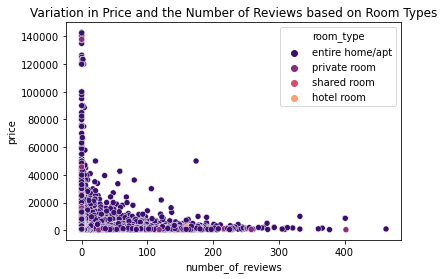

In [25]:
sns.scatterplot(x='number_of_reviews',y='price',data=df_bnb,hue='room_type',palette='magma').set_title('Variation in Price and the Number of Reviews based on Room Types')
plt.ioff()

## Conclusion:

To conclude, the EDA has given very useful insights about the relationships between different variables, especially pertaining to price. From the analysis its clear that the entire home/apartment style is the most common room types, which are the most reviewed, the most available but at the same time are the most expensive too. Another point to note is that most people prefer places below €40,000 which is why the majority of the listings are priced below this number. Also, the neighbourhood plays a very important role in determing the cost of the bnbs. 
Thus major factors that influence price are: 
- Neighbourhood or the locality
- Room type
- Number of reviews
- Availability